In [1]:
%matplotlib inline

import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import random

# Chapter 3

## Easy

These problems use the samples from the posterior distribution for the globe tossing example. This code will give you a specific set of samples, so that you can check your answers exactly.

<Container object of 100 artists>

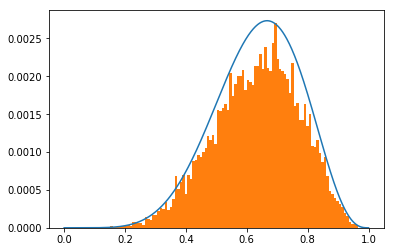

In [2]:
GRID_SIZE = 1000
BINS = 100

p_grid = np.linspace(start=0, stop=1, num=GRID_SIZE)
prior = np.ones(1000)
likelihood = scipy.stats.binom.pmf(k=6, n=9, p=p_grid)
posterior = likelihood * prior
posterior = posterior / np.sum(posterior)
random.seed(100)

def sample_observations_with_replacement(values, distribution, n):
    cumulative = np.cumsum(distribution)
    return np.array([values[np.where(cumulative >= random.random())[0][0]] for i in range(n)])
    
samples = sample_observations_with_replacement(p_grid, posterior, 10000)
fig, ax = plt.subplots()
ax.plot(p_grid, posterior)
results, edges = np.histogram(samples, bins=BINS, normed=True)
binWidth = edges[1] - edges[0]
ax.bar(edges[:-1], results*binWidth/(GRID_SIZE/float(BINS)), binWidth, color='#ff7f0e')

Use the values in *samples* to answer the questions that follow.

**3E1** How much posterior probability lies below p = 0.2?

In [3]:
np.sum(samples < 0.2)/float(len(samples))

0.001

**3E2** How much posterior probability lies above p = 0.8?

In [4]:
np.sum(samples > 0.8)/float(len(samples))

0.1234

**3E3** How much posterior probability lies between p = 0.2 and p = 0.8?

In [5]:
np.sum(np.logical_and(samples > 0.2, samples < 0.8))/float(len(samples))

0.87560000000000004

**3E4** 20% of the posterior probability lies below which value of p?

In [6]:
np.percentile(samples, 20)

0.51651651651651653

**3E5** 20% of the posterior probability lies above which value of p?

In [7]:
np.percentile(samples, 80)

0.75975975975975973

**3E6** Which values of p contain the narrowest interval equal to 66% of the posterior probability?

In [8]:
def highest_posterior_density_interval(samples, prob):
    grid = np.linspace(start=0, stop=100 - prob, num=10000)
    per_i = []
    per_j = []
    width = []
    for i in grid:
        per_i.append(np.percentile(samples, i))
        if i + prob <= 100:
            per_j.append(np.percentile(samples, i + prob))
            width.append(per_j[-1] - per_i[-1])
    i = np.argmin(width)
    print('[' + str(per_i[i]) + ', ' + str(per_j[i]) + '] - width = ' + str(width[i]))
    
highest_posterior_density_interval(samples, 66)

[0.506506506507, 0.77977977978] - width = 0.273273273273


**3E7** Which values of p contain 66% of the posterior probability, assuming equal posterior probability both below and above the interval?

In [9]:
prob = (100 - 66)/2.0
print('[' + str(np.percentile(samples, prob)) + ', ' + str(np.percentile(samples, 100-prob)) + ']')

[0.499499499499, 0.774774774775]


## Medium

**3M1** Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as before.

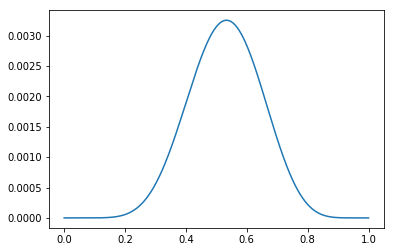

In [10]:
likelihood = scipy.stats.binom.pmf(k=8, n=15, p=p_grid)
posterior = likelihood * prior
posterior = posterior / np.sum(posterior)

fig, ax = plt.subplots()
ax.plot(p_grid, posterior)

**3M2** Draw 10,000 samples from the grid approximation from above. Then use the samples to calculate the 90% HPDI for p.

In [11]:
samples = sample_observations_with_replacement(p_grid, posterior, 10000)
highest_posterior_density_interval(samples, 90)

[0.331331331331, 0.716716716717] - width = 0.385385385385


**3M3** Construct a posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in p. What is the probability of observing 8 water in 15 tosses?

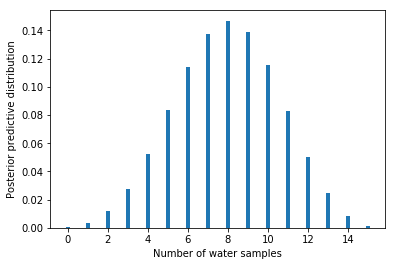

In [12]:
N = 15
post_pred = np.zeros(N + 1)
i = 0
for p in p_grid:
    sample = np.random.binomial(N, p=p, size=100000)
    dist, edges = np.histogram(sample, bins=np.linspace(start=0, stop=N, num=N+2))
    post_pred += posterior[i] * dist / np.sum(dist) 
    i = i + 1
fig, ax = plt.subplots()
ax.bar(range(N + 1), post_pred, width=0.2)
ax.set_xlabel('Number of water samples')
ax.set_ylabel('Posterior predictive distribution')

**3M4** Using the posterior distribution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.

In [13]:
# Using the samples list which contains the p values samples from the posterior
sample = np.random.binomial(N, p=samples)
print(np.sum(sample==6)/float(len(sample)))

0.1159


**3M5** Start over at **3M1**, but now use a prior that is zero below p = 0.5 and a constant above p = 0.5.  is corresponds to prior information that a majority of the Earth’s surface is water. Repeat each problem above and compare the inferences. What difference does the better prior make? If it helps, compare inferences (using both priors) to the true value p = 0.7.

HPDI
[0.500500500501, 0.711711711712] - width = 0.211211211211


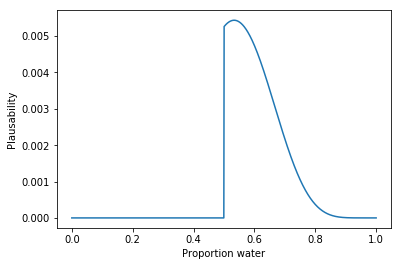

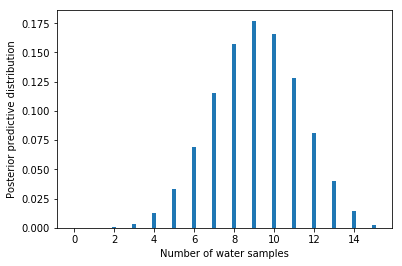

In [14]:
prior = np.ones(p_grid.shape[0])
prior[0:int(prior.shape[0]/2)] = 0

posterior = likelihood * prior
posterior = posterior / np.sum(posterior)

fig, ax = plt.subplots()
ax.plot(p_grid, posterior)
ax.set_xlabel('Proportion water')
ax.set_ylabel('Plausability')

print('HPDI')
samples = sample_observations_with_replacement(p_grid, posterior, 10000)
highest_posterior_density_interval(samples, 90)

N = 15
post_pred = np.zeros(N + 1)
i = 0
for p in p_grid:
    sample = np.random.binomial(N, p=p, size=100000)
    dist, edges = np.histogram(sample, bins=np.linspace(start=0, stop=N, num=N+2))
    post_pred += posterior[i] * dist / np.sum(dist) 
    i = i + 1
fig, ax = plt.subplots()
ax.bar(range(N + 1), post_pred, width=0.2)
ax.set_xlabel('Number of water samples')
ax.set_ylabel('Posterior predictive distribution')

The MAP for p is closer to 0.7 now, the real p value. The HPDI is narrower around that value. The maximum of the posterior predictive distribution is 9 instead of 8 and it is narrower. Once again, that makes p closer to 0.7, the real proportion of water. 

## Hard

**Introduction** The practice problems here all use the data below. These data indicate the gender
(male=1, female=0) of offcially reported first and second born children in 100 two-child families.

In [15]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

So for example, the  rst family in the data reported a boy (1) and then a girl (0).  e second family reported a girl (0) and then a boy (1).  e third family reported two girls.

Use these vectors as data. So for example to compute the total number of boys born across all of these births, you could use:

In [16]:
 np.sum(birth1) + np.sum(birth2)

111

**3H1** Using grid approximation, compute the posterior distribution for the probability of a birth being a boy. Assume a uniform prior probability. Which parameter value maximizes the posterior probability?

Maximum at 0.554554554555


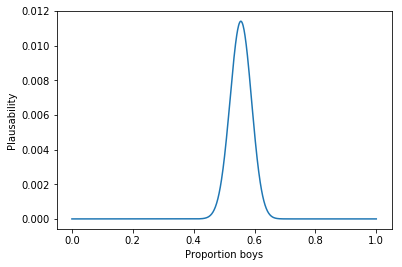

In [17]:
p_grid = np.linspace(start=0, stop=1, num=GRID_SIZE)
prior = np.ones(1000)
likelihood = scipy.stats.binom.pmf(k=np.sum(birth1) + np.sum(birth2), 
                                   n=len(birth1) + len(birth2), 
                                   p=p_grid)
posterior = likelihood * prior
posterior = posterior / np.sum(posterior)

fig, ax = plt.subplots()
ax.plot(p_grid, posterior)
ax.set_xlabel('Proportion boys')
ax.set_ylabel('Plausability')

print('Maximum at ' + str(p_grid[posterior.argmax()]))

**3H2** Using the sample function, draw 10,000 random parameter values from the posterior distribution you calculated above. Use these samples to estimate the 50%, 89%, and 97% highest posterior density intervals.

In [18]:
samples = sample_observations_with_replacement(p_grid, posterior, 10000)

highest_posterior_density_interval(samples, 50)
highest_posterior_density_interval(samples, 89)
highest_posterior_density_interval(samples, 97)

[0.530530530531, 0.577577577578] - width = 0.047047047047
[0.496496496496, 0.607607607608] - width = 0.111111111111
[0.475475475475, 0.626626626627] - width = 0.151151151151


**3H3** Use rbinom to simulate 10,000 replicates of 200 births. You should end up with 10,000 numbers, each one a count of boys out of 200 births. Compare the distribution of predicted numbers of boys to the actual count in the data (111 boys out of 200 births). There are many good ways to visualize the simulations, but the dens command (part of the rethinking package) is probably the easiest way in this case. Does it look like the model fits the data well? That is, does the distribution of predictions include the actual observation as a central, likely outcome?

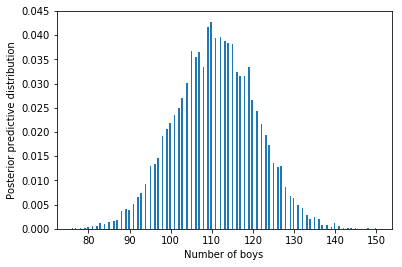

In [19]:
sample = np.random.binomial(200, p=samples)
fig, ax = plt.subplots()
ax.hist(sample, weights=[1/10000.0]*10000, bins=200)
ax.set_xlabel('Number of boys')
ax.set_ylabel('Posterior predictive distribution')

Yes, the model seems to fit the data well, because the distribution of predictions includes the actual observation as a central likely outcome.

**3H4** Now compare 10,000 counts of boys from 100 simulated first borns only to the number of boys in the first births, *birth1*. How does the model look in this light?

Real number of boys among first borns: 51


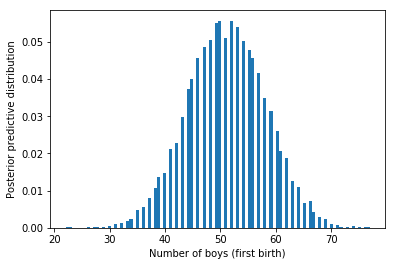

In [20]:
likelihood = scipy.stats.binom.pmf(k=np.sum(birth1), n=len(birth1), p=p_grid)
posterior = likelihood * prior
posterior = posterior / np.sum(posterior)

samples = sample_observations_with_replacement(p_grid, posterior, 10000)

sample = np.random.binomial(100, p=samples)
fig, ax = plt.subplots()
ax.hist(sample, weights=[1/10000.0]*10000, bins=100)
ax.set_xlabel('Number of boys (first birth)')
ax.set_ylabel('Posterior predictive distribution')

print('Real number of boys among first borns: ' + str(np.sum(birth1)))

Once again, the model seems to fit the data well, because the distribution of predictions includes the actual observation as a central likely outcome.

**3H5** The model assumes that sex of first and second births are independent. To check this assumption, focus now on second births that followed female first borns. Compare 10,000 simulated counts of boys to only those second births that followed girls. To do this correctly, you need to count the number of first borns who were girls and simulate that many births, 10,000 times. Compare the counts of boys in your simulations to the actual observed count of boys following girls. How does the model look in this light? Any guesses what is going on in these data?

In [21]:
print(str(np.sum(birth1 == 0)) + ' first borns that were girls')
print(str(np.sum(birth2[birth1 == 0] == 1)) + ' boys borned after a girl')

49 first borns that were girls
39 boys borned after a girl


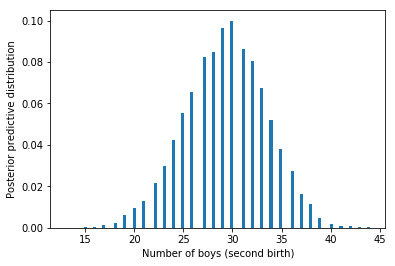

In [22]:
likelihood = scipy.stats.binom.pmf(k=np.sum(birth2), n=len(birth2), p=p_grid)
posterior = likelihood * prior
posterior = posterior / np.sum(posterior)

samples = sample_observations_with_replacement(p_grid, posterior, 10000)

sample = np.random.binomial(49, p=samples)
fig, ax = plt.subplots()
ax.hist(sample, weights=[1/10000.0]*10000, bins=100)
ax.set_xlabel('Number of boys (second birth)')
ax.set_ylabel('Posterior predictive distribution')

The model does not fit the actual data. 39 boys after 49 girls is a very unlikely event according to the model. This may be due to a lack of independence between the first and the second birth.

Let's compare the plausability of the proportion of boys and girls in the second birth after a boy or a girl in the first birth

Maximum at 0.795795795796
Maximum at 0.204204204204
Maximum at 0.411411411411
Maximum at 0.588588588589


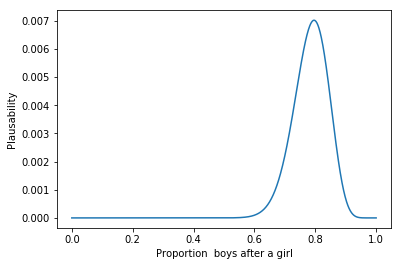

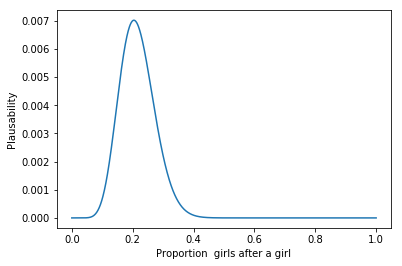

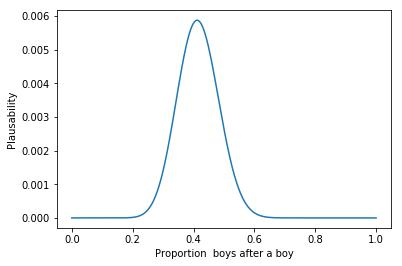

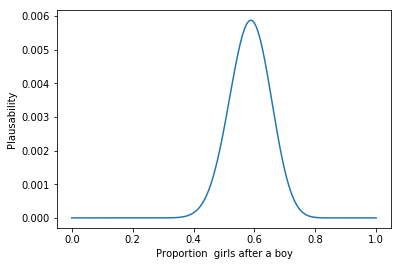

In [23]:
def plot_posterior(k, n, label):
    likelihood = scipy.stats.binom.pmf(k=k, n=n, p=p_grid)
    posterior = likelihood * prior
    posterior = posterior / np.sum(posterior)

    fig, ax = plt.subplots()
    ax.plot(p_grid, posterior)
    ax.set_xlabel('Proportion ' + label)
    ax.set_ylabel('Plausability')

    print('Maximum at ' + str(p_grid[posterior.argmax()]))
    
plot_posterior(np.sum(birth2[birth1 == 0] == 1), np.sum(birth1 == 0), ' boys after a girl')
plot_posterior(np.sum(birth2[birth1 == 0] == 0), np.sum(birth1 == 0), ' girls after a girl')
plot_posterior(np.sum(birth2[birth1 == 1] == 1), np.sum(birth1 == 1), ' boys after a boy')
plot_posterior(np.sum(birth2[birth1 == 1] == 0), np.sum(birth1 == 1), ' girls after a boy')

The difference between the first and the second birth is more extreme if the first birth is a girl. 